In [1]:
# BOSTON CASAS

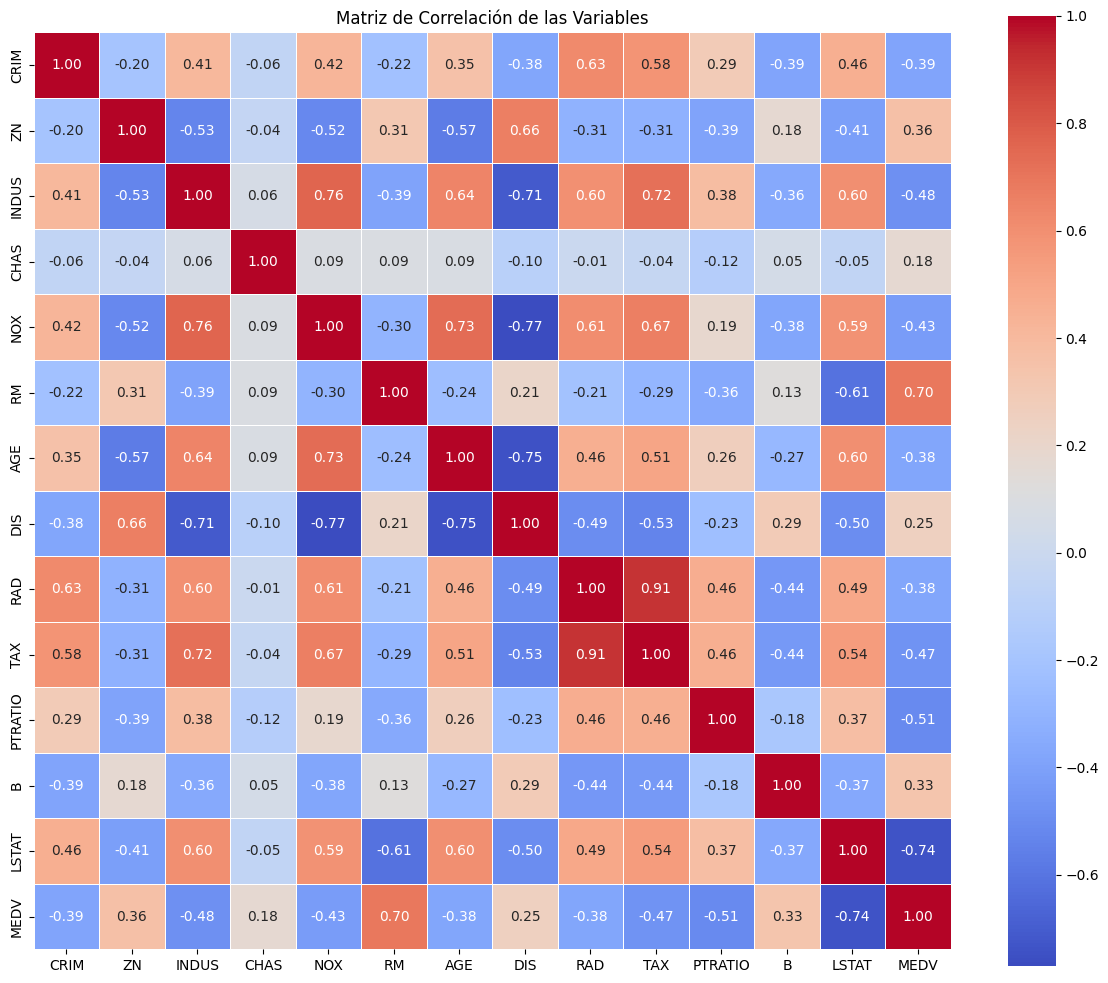

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar archivo Excel
file_path = "boston_house_prices.xlsx"
xls = pd.ExcelFile(file_path)
df = xls.parse('boston_house_prices - ES')

# Calcular matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Visualizar matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Matriz de Correlación de las Variables")
plt.tight_layout()
plt.show()


Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None

Estadísticas descriptivas:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524  

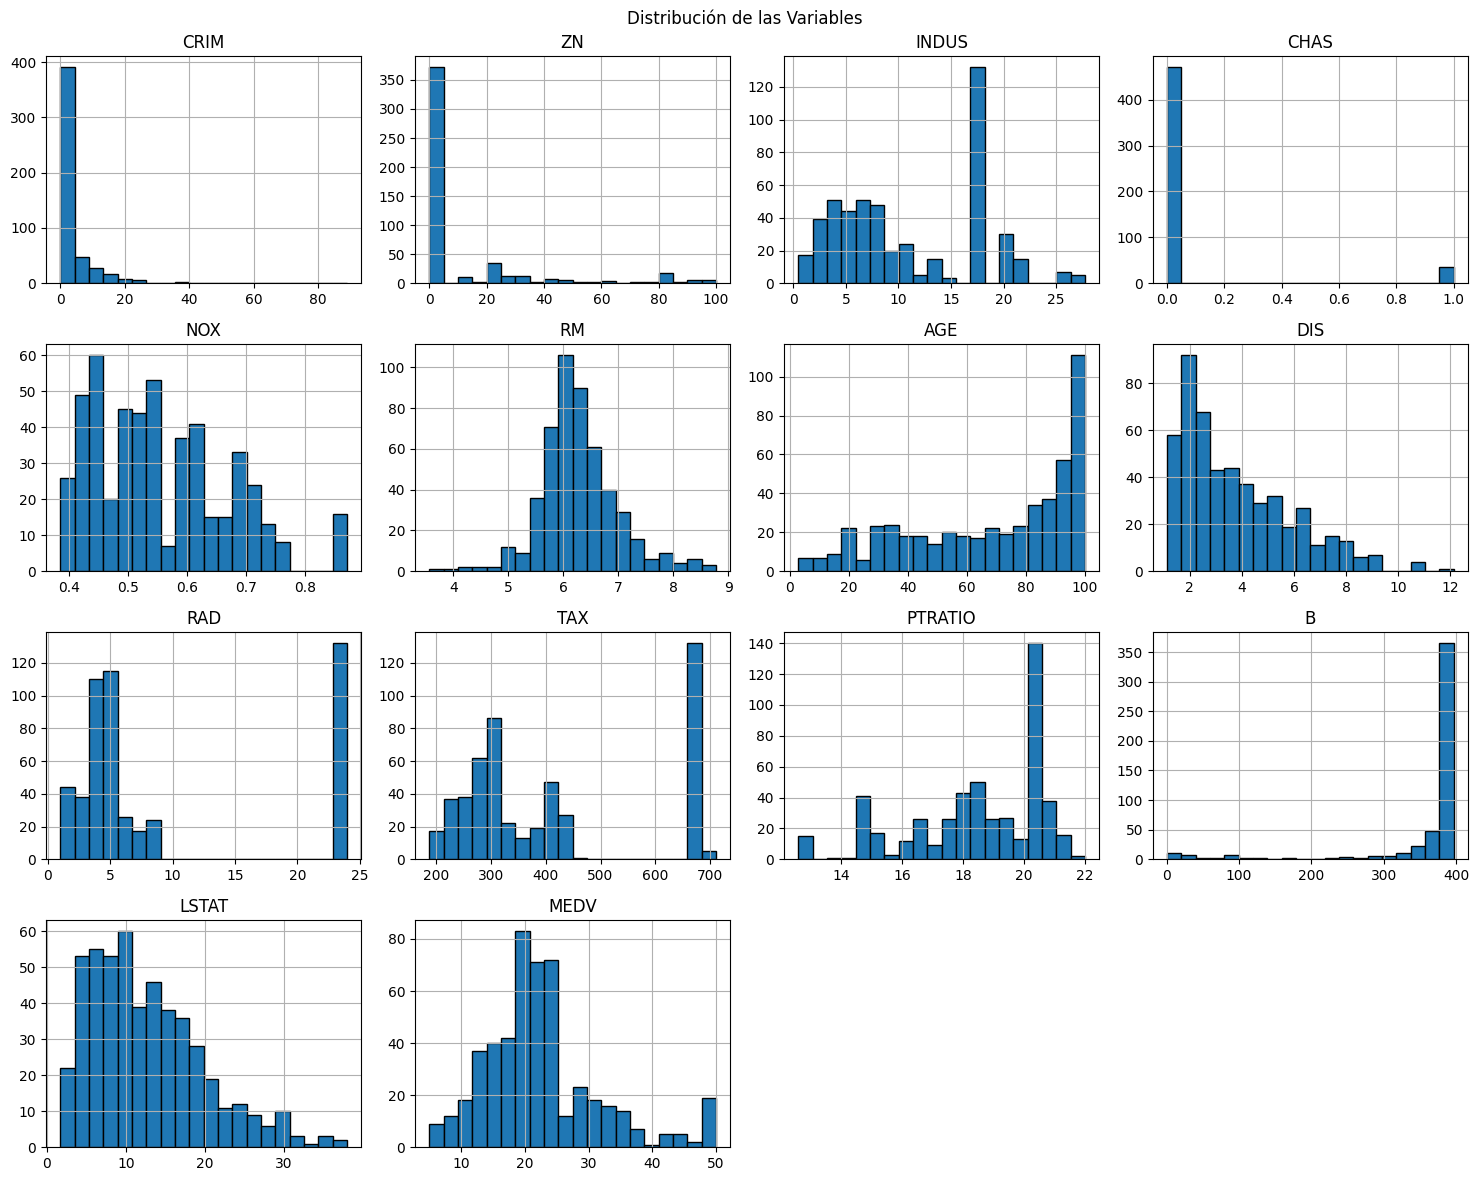

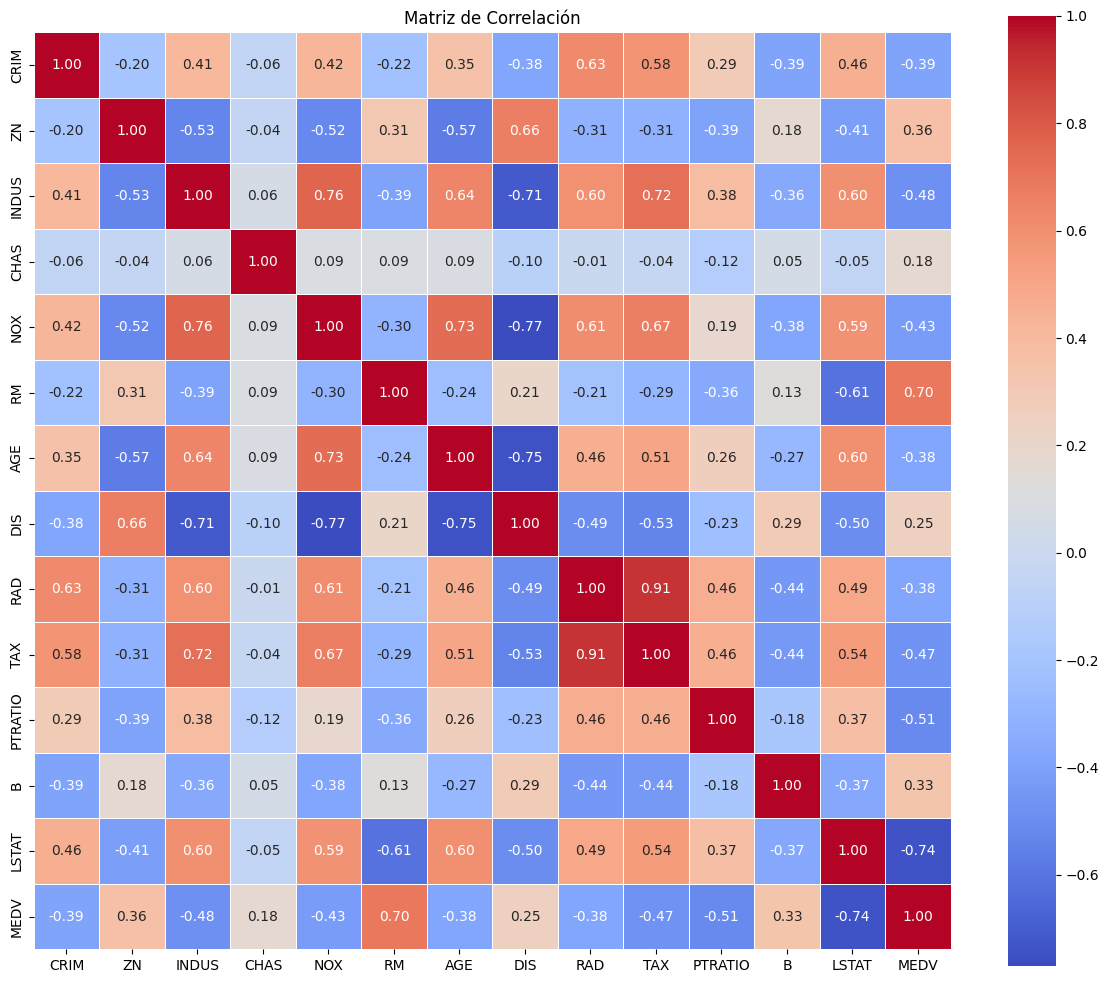

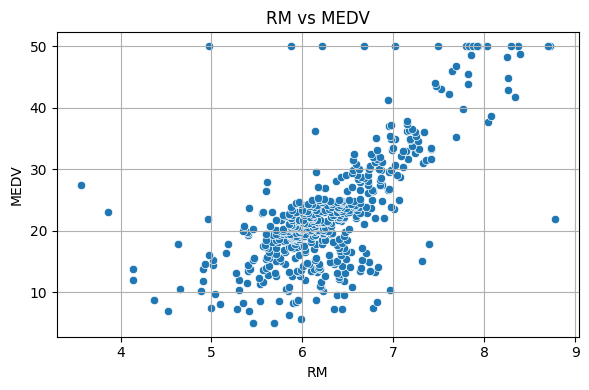

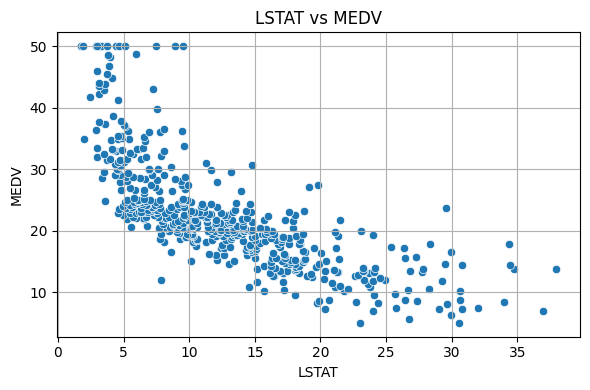

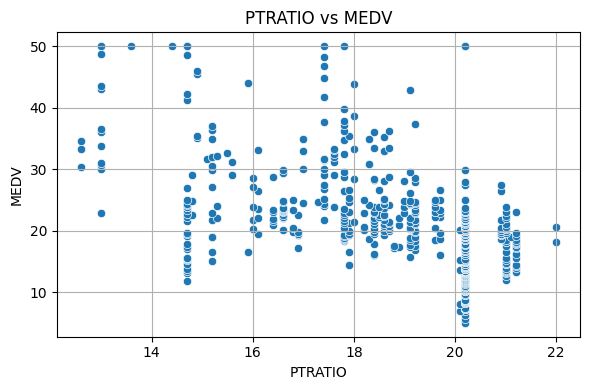

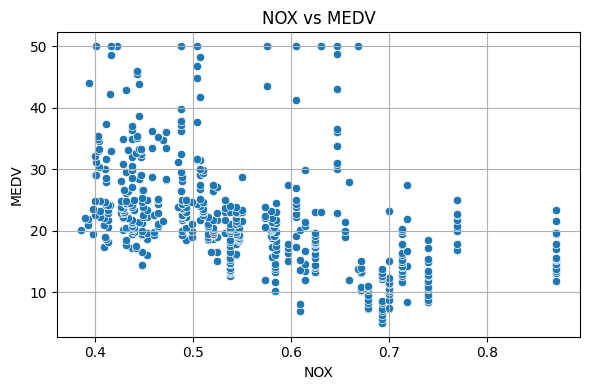

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
file_path = "boston_house_prices.xlsx"
xls = pd.ExcelFile(file_path)
df = xls.parse('boston_house_prices - ES')

# Información general
print("Resumen del dataset:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Histograma de cada variable numérica
df.hist(bins=20, figsize=(15, 12), edgecolor='black')
plt.suptitle("Distribución de las Variables")
plt.tight_layout()
plt.show()

# Mapa de calor de correlaciones
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()

# Gráficos de dispersión de variables más correlacionadas con MEDV
variables_interes = ['RM', 'LSTAT', 'PTRATIO', 'NOX']

for var in variables_interes:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=var, y='MEDV')
    plt.title(f'{var} vs MEDV')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

# Cargar los datos
df = pd.read_excel('boston_house_prices.xlsx', sheet_name='boston_house_prices - ES')

# 1. Análisis Exploratorio
print("="*50)
print("Análisis Exploratorio")
print("="*50)
print(f"Número de registros: {df.shape[0]}")
print(f"Número de características: {df.shape[1]}")
print("\nResumen estadístico:")
print(df.describe().round(2))

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Distribución de la variable objetivo
plt.figure(figsize=(10, 6))
sns.histplot(df['MEDV'], kde=True, bins=30)
plt.title('Distribución de Precios de Viviendas (MEDV)')
plt.xlabel('Precio ($1000s)')
plt.ylabel('Frecuencia')
plt.savefig('distribucion_precios.png', dpi=300)
plt.close()

# Correlaciones
corr_matrix = df.corr().round(2)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.savefig('matriz_correlacion.png', dpi=300)
plt.close()

# 2. Preprocesamiento
# Separar características y objetivo
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Modelos
# Configuración común para ambos modelos
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

# Entrenamiento y optimización de modelos
def train_and_evaluate(model, param_grid, name):
    print(f"\n{'='*50}")
    print(f"Entrenando {name}")
    print(f"{'='*50}")
    
    # Búsqueda de hiperparámetros
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train_scaled, y_train)
    
    # Mejores parámetros
    print(f"\nMejores parámetros para {name}:")
    print(grid_search.best_params_)
    
    # Mejor modelo
    best_model = grid_search.best_estimator_
    
    # Predicciones
    y_pred_train = best_model.predict(X_train_scaled)
    y_pred_test = best_model.predict(X_test_scaled)
    
    # Métricas
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    print("\nMétricas de rendimiento:")
    print(f"RMSE Train: {rmse_train:.4f}")
    print(f"RMSE Test: {rmse_test:.4f}")
    print(f"R² Train: {r2_train:.4f}")
    print(f"R² Test: {r2_test:.4f}")
    
    # Gráfico de predicciones vs valores reales
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_test, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.title(f'Predicciones vs Valores Reales - {name}')
    plt.xlabel('Valores Reales (MEDV)')
    plt.ylabel('Predicciones (MEDV)')
    plt.grid(True)
    plt.savefig(f'predicciones_{name.replace(" ", "_")}.png', dpi=300)
    plt.close()
    
    # Importancia de características
    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
    else:
        result = permutation_importance(best_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
        importances = result.importances_mean
    
    feature_importance = pd.DataFrame({
        'Característica': X.columns,
        'Importancia': importances
    }).sort_values('Importancia', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importancia', y='Característica', data=feature_importance)
    plt.title(f'Importancia de Características - {name}')
    plt.tight_layout()
    plt.savefig(f'importancia_{name.replace(" ", "_")}.png', dpi=300)
    plt.close()
    
    return {
        'Modelo': name,
        'Mejor Modelo': best_model,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R² Train': r2_train,
        'R² Test': r2_test,
        'Importancia': feature_importance
    }

# Entrenar modelos
rf_results = train_and_evaluate(
    RandomForestRegressor(random_state=42),
    param_grid_rf,
    "Random Forest"
)

gb_results = train_and_evaluate(
    GradientBoostingRegressor(random_state=42),
    param_grid_gb,
    "Gradient Boosting"
)

# 4. Comparación de modelos
results_df = pd.DataFrame({
    'Modelo': [rf_results['Modelo'], gb_results['Modelo']],
    'RMSE Train': [rf_results['RMSE Train'], gb_results['RMSE Train']],
    'RMSE Test': [rf_results['RMSE Test'], gb_results['RMSE Test']],
    'R² Train': [rf_results['R² Train'], gb_results['R² Train']],
    'R² Test': [rf_results['R² Test'], gb_results['R² Test']]
})

print("\n" + "="*50)
print("Comparación Final de Modelos")
print("="*50)
print(results_df)

# 5. Análisis de errores
for model_result in [rf_results, gb_results]:
    name = model_result['Modelo']
    model = model_result['Mejor Modelo']
    
    # Predicciones en test
    y_pred = model.predict(X_test_scaled)
    residuals = y_test - y_pred
    
    # Gráfico de residuales
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residuales vs Predicciones - {name}')
    plt.xlabel('Predicciones')
    plt.ylabel('Residuales')
    plt.grid(True)
    plt.savefig(f'residuales_{name.replace(" ", "_")}.png', dpi=300)
    plt.close()
    
    # Distribución de errores
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f'Distribución de Errores - {name}')
    plt.xlabel('Error de Predicción')
    plt.savefig(f'error_dist_{name.replace(" ", "_")}.png', dpi=300)
    plt.close()

# 6. Hallazgos clave
print("\n" + "="*50)
print("Hallazgos Clave")
print("="*50)
print(f"- Mejor modelo: {results_df.loc[results_df['R² Test'].idxmax(), 'Modelo']}")
print(f"- R² en test del mejor modelo: {results_df['R² Test'].max():.4f}")
print(f"- RMSE en test del mejor modelo: {results_df.loc[results_df['RMSE Test'].idxmin(), 'RMSE Test']:.4f}")

# Comparar importancia de características
rf_imp = rf_results['Importancia'].set_index('Característica')['Importancia']
gb_imp = gb_results['Importancia'].set_index('Característica')['Importancia']
importance_compare = pd.DataFrame({
    'Random Forest': rf_imp,
    'Gradient Boosting': gb_imp
}).sort_values('Gradient Boosting', ascending=False)

print("\nTop 5 características más importantes:")
print(importance_compare.head(5))

# Gráfico comparativo de importancia
plt.figure(figsize=(12, 8))
importance_compare.head(10).plot(kind='barh', figsize=(12, 8))
plt.title('Comparación de Importancia de Características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.savefig('comparacion_importancia.png', dpi=300)
plt.close()

Análisis Exploratorio
Número de registros: 506
Número de características: 14

Resumen estadístico:
         CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD  \
count  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00   
mean     3.61   11.36   11.14    0.07    0.55    6.28   68.57    3.80    9.55   
std      8.60   23.32    6.86    0.25    0.12    0.70   28.15    2.11    8.71   
min      0.01    0.00    0.46    0.00    0.38    3.56    2.90    1.13    1.00   
25%      0.08    0.00    5.19    0.00    0.45    5.89   45.02    2.10    4.00   
50%      0.26    0.00    9.69    0.00    0.54    6.21   77.50    3.21    5.00   
75%      3.68   12.50   18.10    0.00    0.62    6.62   94.07    5.19   24.00   
max     88.98  100.00   27.74    1.00    0.87    8.78  100.00   12.13   24.00   

          TAX  PTRATIO       B   LSTAT    MEDV  
count  506.00   506.00  506.00  506.00  506.00  
mean   408.24    18.46  356.67   12.65   22.53  
std    168.54     2.16  

<Figure size 1200x800 with 0 Axes>